# Other figures

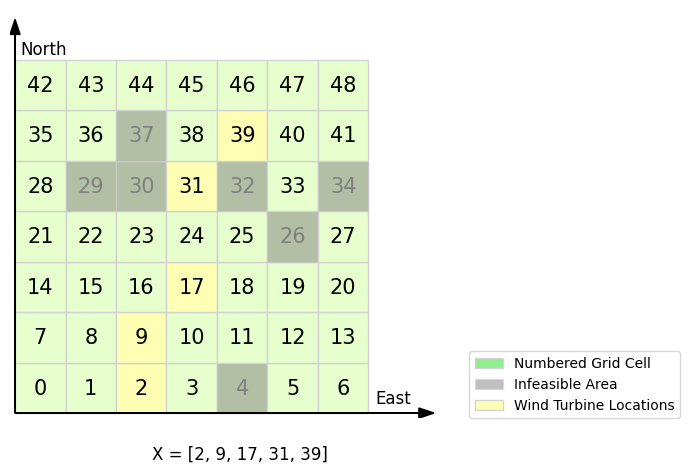

In [71]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.legend_handler import HandlerBase
from matplotlib.transforms import TransformedBbox
from matplotlib.image import BboxImage
from matplotlib.legend_handler import HandlerBase
import PIL
import urllib

# Create a 7x7 grid
fig, ax = plt.subplots(figsize=(7, 7))
ax.set_xlim(-0.1, 9)
ax.set_ylim(-0.1, 8)
ax.set_aspect('equal')

# Randomly pick 7 locations for infeasible areas
np.random.seed(0)  # For reproducibility
infeasible_indices = np.random.choice(range(49), size=7, replace=False)

# Randomly pick 5 locations for wind turbines
wind_turbine_indices = np.random.choice([i for i in range(49) if i not in infeasible_indices], size=5, replace=False)
wind_turbine_indices.sort()

# # Load wind turbine icon (now we do not use this icon)
# icon_path = 'https://github.com/ShitianZhang22/Wind-Farm-Layout-Optimisation/blob/main/icon/turbine.png?raw=true'
# icon = np.array(PIL.Image.open(urllib.request.urlopen(icon_path)))

# Draw grid cells with light green filling and light grey borders
for i in range(7):
    for j in range(7):
        if j * 7 + i in infeasible_indices:
            ax.add_patch(mpatches.Rectangle((i, j), 1, 1, edgecolor='lightgrey', facecolor=(0.9, 1, 0.8)))
            ax.add_patch(mpatches.Rectangle((i, j), 1, 1, edgecolor='lightgrey', facecolor='grey', alpha=0.5))
            ax.text(i + 0.5, j + 0.5, str(j * 7 + i), color='grey', ha='center', va='center', fontsize=15)
        elif j * 7 + i in wind_turbine_indices:
            ax.add_patch(mpatches.Rectangle((i, j), 1, 1, edgecolor='lightgrey', facecolor=(1, 1, 0.7)))
            ax.text(i + 0.5, j + 0.5, str(j * 7 + i), color='black', ha='center', va='center', fontsize=15)
            # imagebox = OffsetImage(icon, zoom=0.7)
            # ab = AnnotationBbox(imagebox, (i + 0.5, j + 0.5), frameon=False)
            # ax.add_artist(ab)
        else:
            ax.add_patch(mpatches.Rectangle((i, j), 1, 1, edgecolor='lightgrey', facecolor=(0.9, 1, 0.8)))
            ax.text(i + 0.5, j + 0.5, str(j * 7 + i), color='black', ha='center', va='center', fontsize=15)

# Draw axes
ax.arrow(0, 0, 8, 0, head_width=0.2, head_length=0.3, fc='black', ec='black')  # East axis
ax.arrow(0, 0, 0, 7.5, head_width=0.2, head_length=0.3, fc='black', ec='black')  # North axis
ax.text(7.5, 0.2, 'East', color='black', fontsize=12, ha='center')
ax.text(0.1, 7.2, 'North', color='black', fontsize=12, va='center') 
    
# Add legend
legend_elements = [
    mpatches.Patch(facecolor='lightgreen', edgecolor='lightgrey', label='Numbered Grid Cell'),
    mpatches.Patch(facecolor='grey', edgecolor='lightgrey', alpha=0.5, label='Infeasible Area'),
    mpatches.Patch(facecolor=(1, 1, 0.7), edgecolor='lightgrey', label='Wind Turbine Locations'),
]
ax.legend(handles=legend_elements, loc=(1, 0), fontsize=10)

# Add layout vector formula
layout_vector = f"X = [{', '.join(map(str, wind_turbine_indices))}]"
ax.text(0.5, -0.1, layout_vector, fontsize=12, ha='center', transform=ax.transAxes)

# Remove axes
ax.axis('off')

# Show the plot
plt.tight_layout()
plt.show()